# Code version 0
### * Date Created: 27-03-2021
### * Main Author: Ricardo Luhm
### * Colaborators: -

In [1]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt


In [2]:
class Stock_Forescast():

    def __init__(self,df, index = ["Date"], log_e = True):
        # %% Set index
        df = df.set_index(index,drop=True)
        self.df = df
        
        #self.X_Y_array = df.to_numpy()
        self.X_Y_array = df.to_numpy().T

        self.log_e = log_e
        if log_e:
            self.X_Y_array = np.log(self.X_Y_array)
            
    def train_theta(self, X_Y_array):
        self.X_Y_array = X_Y_array

        A = X_Y_array[:,:-2]
        self.A_train = A

        y = X_Y_array[:,-2]
        self.y_train = y

        AtA = A.T.dot(A) ## what is the best N x N shape for A to get the best theta
        ### the best theta means a lower prediction error
        ### test the what if for normalized data.
        AtAi = np.linalg.inv(AtA)
        AtAi_At = AtAi.dot(A.T)
        theta = AtAi_At.dot(y)
        self.theta = theta
        return theta

    def test_theta(self):

        A_predict = self.X_Y_array[:,1:-1]
        self.A_predict = A_predict
        y_predict = A_predict.dot(self.theta)
        y_true = self.X_Y_array[:,-1]
        if self.log_e:
            y_predict = np.exp(y_predict)
            y_true = np.exp(y_true)

        self.y_predict=y_predict
        self.y_true=y_true

        return y_predict, y_true
    
    def model_stats(self, name = ""):
        error = self.y_true - self.y_predict

        #error_abs = np.abs(error)
        print("#"*25,"Error {} Histogram".format(name))


        dimen = str(int(error.max()))
        bins = np.arange(len(dimen)+1)
        bins2 = np.ones(len(bins)).astype(float)
        for num, i in enumerate(bins):
            a = float("1e{}".format(i))
            bins2[num] = a

        hist_vnar, bin_edges_vnar = np.histogram( error, bins=20,
                                                  density=False, range = (0,5e2) )


        hist_nar, bin_edges_nar = np.histogram(error, bins=10 ,density=False,
                                range = (0,1e6))

        hist_wd, bin_edges_wd = np.histogram(error , bins=bins2, density=False)

        plt.hist(error, bins=bin_edges_wd, density=False)
        plt.title("Error - Wide View - {} - Histogram".format(name))
        plt.show()

        plt.hist(error, bins=bin_edges_nar, density=False)
        plt.title("Error - Narrow View - {} - Histogram".format(name))
        plt.show()

        plt.hist(error, bins=bin_edges_vnar, density=False)
        plt.title("Error - Very Narrow View - {} - Histogram".format(name))
        plt.show()


######################### Error Raw Data - Volumes and Prices Histogram


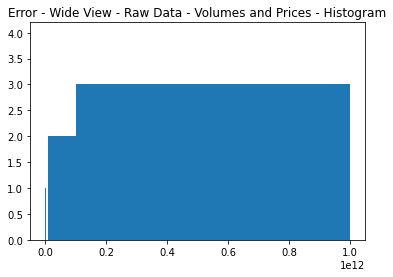

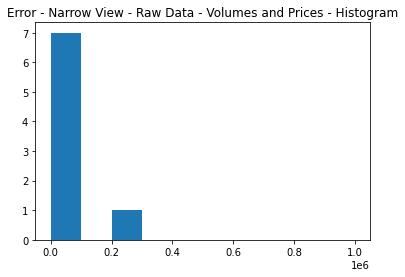

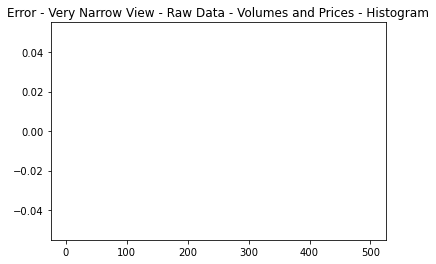

In [3]:
name = "Raw Data - Volumes and Prices"
index = ["Date"]
apply_log = False

fin_path = "finances.csv"
finances_raw = pd.read_csv(fin_path)

stf = Stock_Forescast(finances_raw, index = ["Date"], log_e = apply_log)

theta = stf.train_theta(stf.X_Y_array)

y_predict, y_true = stf.test_theta()

stf.model_stats(name = name)


<ipython-input-2-5365a0a43146>:40: RuntimeWarning: overflow encountered in exp
  y_predict = np.exp(y_predict)
######################### Error Log Data - Volumes and Prices Histogram


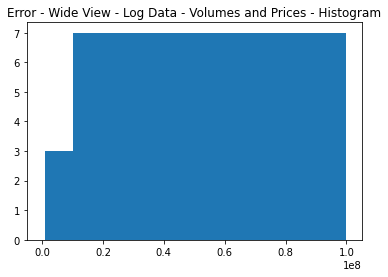

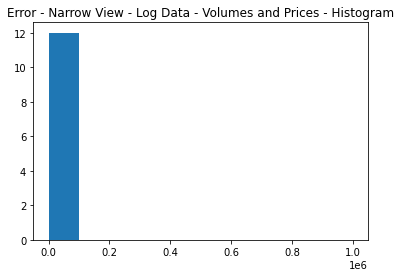

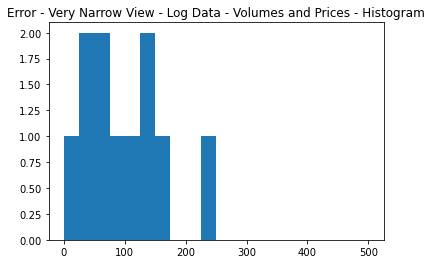

In [4]:
name = "Log Data - Volumes and Prices"
apply_log = True

stf = Stock_Forescast(finances_raw, index = ["Date"], log_e = apply_log)

log_theta = stf.train_theta(stf.X_Y_array)

y_predict, y_true = stf.test_theta()

stf.model_stats(name = name)

In [5]:

all_cols = finances_raw.columns.tolist()
all_cols.remove("Date")

In [6]:
adj_pack = []
vol_pack = []
for cols in all_cols:
    if len(cols.split("Adj Close"))>1:
        stock = cols.split("Adj Close")[1]
        adj_pack.append([stock,cols])
    else:
        stock = cols.split("Volume")[1]
        vol_pack.append([stock,cols])
adj_arr = np.array(adj_pack)
vol_arr = np.array(vol_pack)

price_cols = adj_arr[:,1].tolist() + ["Date"]

vol_cols = vol_arr[:,1].tolist() + ["Date"]


######################### Error Raw Data - Prices Histogram


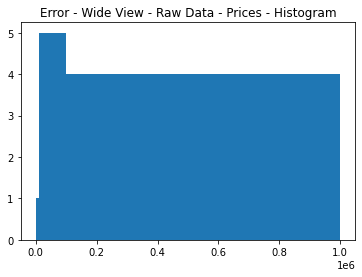

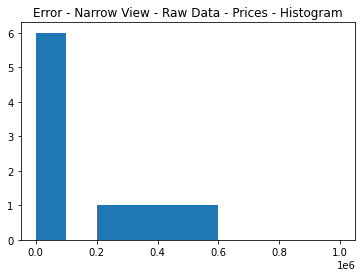

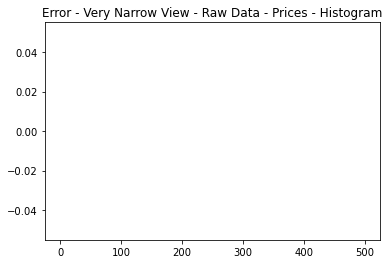

In [7]:
name = "Raw Data - Prices"
apply_log = False

stf = Stock_Forescast(finances_raw[price_cols], index = ["Date"], log_e = apply_log)

log_theta = stf.train_theta(stf.X_Y_array)

y_predict, y_true = stf.test_theta()

stf.model_stats(name = name)



<ipython-input-2-5365a0a43146>:40: RuntimeWarning: overflow encountered in exp
  y_predict = np.exp(y_predict)
######################### Error Log Data - Prices Histogram


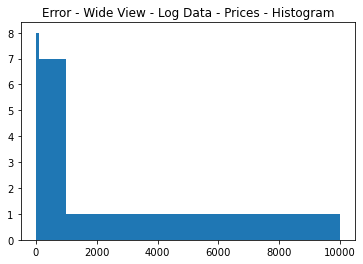

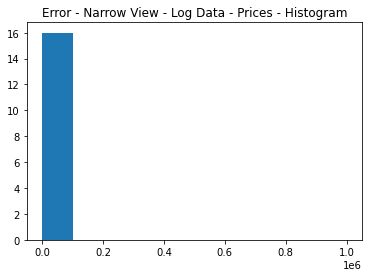

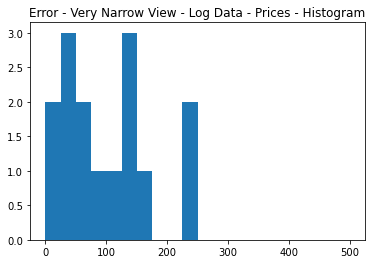

In [8]:
name = "Log Data - Prices"
apply_log = True

stf = Stock_Forescast(finances_raw[price_cols], index = ["Date"], log_e = apply_log)

log_theta = stf.train_theta(stf.X_Y_array)

y_predict, y_true = stf.test_theta()

stf.model_stats(name = name)


In [9]:
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [10]:
X = pd.read_csv(fin_path)
Y = X.copy(deep=True).drop(labels='Date', axis=1).shift(-1).dropna()
Y

,Adj Close AAPL,Volume AAPL,Adj Close ABC,Volume ABC,Adj Close AMZN,Volume AMZN,Adj Close BAC,Volume BAC,Adj Close BP,Volume BP,...,Adj Close TM,Volume TM,Adj Close TOT,Volume TOT,Adj Close UNH,Volume UNH,Adj Close WMT,Volume WMT,Adj Close XOM,Volume XOM
0,1.238824,4.204488e+09,11.963464,20746800.0,34.750000,29673700.0,32.568451,41283300.0,28.190603,20307100.0,...,60.897354,1033500.0,25.029329,12568800.0,38.062389,23441200.0,36.379776,47133000.0,36.655407,170203800.0
1,1.321578,3.553878e+09,12.072557,18499200.0,34.160000,26026800.0,31.977856,55968800.0,28.584154,15497500.0,...,59.136475,1251700.0,25.292948,8275800.0,38.471340,25304200.0,36.273994,152631200.0,37.616077,112404900.0
2,1.307426,2.055071e+09,12.122155,8516800.0,32.880001,23236100.0,31.131090,50533000.0,26.983763,15531900.0,...,57.777191,1247600.0,24.109774,7194000.0,39.145905,19556000.0,35.822327,70161800.0,35.424568,88667200.0
3,1.257898,2.409145e+09,11.179917,59184000.0,34.009998,24386400.0,31.316097,59839000.0,27.442883,15717000.0,...,57.360142,1306800.0,24.425285,6156000.0,40.402290,31713800.0,34.641449,82434700.0,36.355190,104896100.0
4,1.345573,2.708017e+09,11.471516,30875600.0,34.599998,24371600.0,31.792841,44185900.0,27.648401,16214000.0,...,58.888752,1218300.0,24.394154,7033000.0,41.499165,30453600.0,34.344475,84086800.0,36.030968,85301200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,136.555939,4.391332e+08,109.235847,7789100.0,3352.149902,25631900.0,32.369999,237647600.0,20.532003,146399000.0,...,150.860001,1853400.0,42.320000,16378400.0,324.510010,21410000.0,144.360001,35234900.0,49.115902,145044300.0
831,135.369995,3.453017e+08,104.744514,5329400.0,3277.709961,13237600.0,33.369999,193834200.0,21.617310,95017100.0,...,160.490005,2934800.0,42.770000,16416900.0,328.239990,18515000.0,144.470001,25487800.0,49.676384,138395500.0
832,129.869995,3.622987e+08,105.870003,3276200.0,3249.899902,13185300.0,34.540001,190095000.0,22.564486,61151200.0,...,153.550003,1467500.0,44.970001,9539700.0,324.579987,11655700.0,138.339996,62243200.0,52.369999,96610400.0
833,121.260002,6.837847e+08,101.220001,4993900.0,3092.929932,19957700.0,34.709999,327837000.0,24.410000,110431100.0,...,147.929993,2052000.0,46.400002,14423100.0,332.220001,17481300.0,129.919998,61844300.0,54.369999,163519200.0


In [11]:
X['Date'] = pd.to_datetime(X['Date'])
X['Date'] = X['Date'].map(dt.datetime.toordinal)
X.insert(0, 'Intercept', 1)
X

,Intercept,Date,Adj Close AAPL,Volume AAPL,Adj Close ABC,Volume ABC,Adj Close AMZN,Volume AMZN,Adj Close BAC,Volume BAC,...,Adj Close TM,Volume TM,Adj Close TOT,Volume TOT,Adj Close UNH,Volume UNH,Adj Close WMT,Volume WMT,Adj Close XOM,Volume XOM
0,1,732005,1.316963,3.746232e+09,12.427639,20682800.0,35.849998,29684900.0,32.968975,48255000.0,...,60.843304,1086900.0,25.259737,11717200.0,39.331413,20941800.0,37.437328,61478000.0,38.168442,128760400.0
1,1,732012,1.238824,4.204488e+09,11.963464,20746800.0,34.750000,29673700.0,32.568451,41283300.0,...,60.897354,1033500.0,25.029329,12568800.0,38.062389,23441200.0,36.379776,47133000.0,36.655407,170203800.0
2,1,732019,1.321578,3.553878e+09,12.072557,18499200.0,34.160000,26026800.0,31.977856,55968800.0,...,59.136475,1251700.0,25.292948,8275800.0,38.471340,25304200.0,36.273994,152631200.0,37.616077,112404900.0
3,1,732026,1.307426,2.055071e+09,12.122155,8516800.0,32.880001,23236100.0,31.131090,50533000.0,...,57.777191,1247600.0,24.109774,7194000.0,39.145905,19556000.0,35.822327,70161800.0,35.424568,88667200.0
4,1,732033,1.257898,2.409145e+09,11.179917,59184000.0,34.009998,24386400.0,31.316097,59839000.0,...,57.360142,1306800.0,24.425285,6156000.0,40.402290,31713800.0,34.641449,82434700.0,36.355190,104896100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,1,737822,136.555939,4.391332e+08,109.235847,7789100.0,3352.149902,25631900.0,32.369999,237647600.0,...,150.860001,1853400.0,42.320000,16378400.0,324.510010,21410000.0,144.360001,35234900.0,49.115902,145044300.0
832,1,737829,135.369995,3.453017e+08,104.744514,5329400.0,3277.709961,13237600.0,33.369999,193834200.0,...,160.490005,2934800.0,42.770000,16416900.0,328.239990,18515000.0,144.470001,25487800.0,49.676384,138395500.0
833,1,737836,129.869995,3.622987e+08,105.870003,3276200.0,3249.899902,13185300.0,34.540001,190095000.0,...,153.550003,1467500.0,44.970001,9539700.0,324.579987,11655700.0,138.339996,62243200.0,52.369999,96610400.0
834,1,737843,121.260002,6.837847e+08,101.220001,4993900.0,3092.929932,19957700.0,34.709999,327837000.0,...,147.929993,2052000.0,46.400002,14423100.0,332.220001,17481300.0,129.919998,61844300.0,54.369999,163519200.0


In [12]:
X = X.iloc[0:-1]
X.shape


(835, 42)

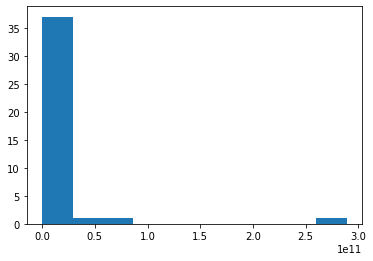

In [13]:

linear_model = LinearRegression(fit_intercept=False)
fit = linear_model.fit(X, Y)

coefs_lib = fit.coef_
norms_lib = np.apply_along_axis(np.linalg.norm, 1, coefs_lib)

plt.hist(norms_lib)
plt.show()


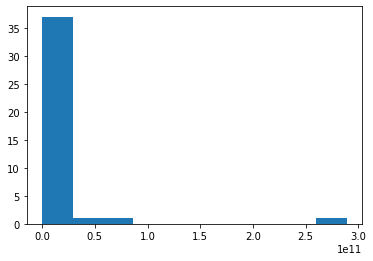

In [14]:

X_pinverse = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
coefs_pinv = np.dot(X_pinverse, Y)
norms_pinv = np.apply_along_axis(np.linalg.norm, 0, coefs_pinv)

plt.hist(norms_pinv)
plt.show()


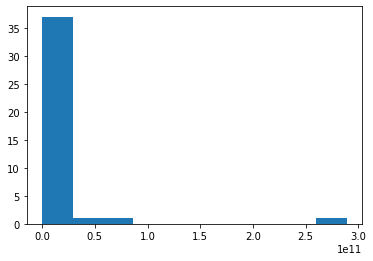

In [15]:
Q, R = np.linalg.qr(X)
X_qr_pinverse = np.dot(np.linalg.inv(R), Q.T)
coefs_qr = np.dot(X_qr_pinverse, Y)
norms_qr = np.apply_along_axis(np.linalg.norm, 0, coefs_qr)

plt.hist(norms_qr)
plt.show()


In [16]:
delta_simple_QR = np.average(np.abs(coefs_pinv - coefs_qr))
delta_simple_QR

0.5652022997816353

In [17]:
delta_simple_lib = np.average(np.abs(coefs_pinv - coefs_lib.T))
delta_simple_lib

2.009113630342412

In [18]:
delta_lib_QR = np.average(np.abs(coefs_lib.T - coefs_qr))
delta_lib_QR

1.4668354057563613